<div style="background-color:black;color:white;padding:20px">

<center><h3> LAA </h3></center>
<center><h1> Projeto Bicóptero </h1></center>

<center> <h1> Procedimento de identificação dos parâmetros de inercia, atrito e caracterização de atuadores</h1></center>

<h3> Por Gabriel Henrique Costa e Silva </h3> 
</div>

<h2> Inicializando as bibliotecas </h2>

In [136]:
# para instalar o itikz
#pip install itikz
%load_ext itikz

The itikz extension is already loaded. To reload it, use:
  %reload_ext itikz


In [137]:
import numpy as np
import matplotlib
matplotlib.rcParams['text.usetex'] = True
import matplotlib.pyplot as plt
from sympy import * 
from sympy import trigsimp, pi, cos, sin
from sympy.physics.mechanics import *
from scipy import signal
from scipy.integrate import odeint
from sympy import Pow

In [138]:
from sympy.physics.vector import init_vprinting
init_vprinting(use_latex='mathjax', pretty_print=False)

In [139]:
t = Symbol("t")

# Angulos Theta
theta1 = Function("theta1")(t)
theta2 = Function("theta2")(t)
theta3 = Function("theta3")(t)
theta4 = Function("theta4")(t)

# Constante da gravidade
g = symbols('g', real = True, constant = True)

# Forcas e Momentos
fx, fy, fz = dynamicsymbols('f_x, f_y, f_z')
taux, tauy, tauz = dynamicsymbols('tau_x, tau_y, tau_z')

# Forcas dos motores
f1,f2= dynamicsymbols('F_1, F_2')
f= dynamicsymbols('F')

# Angulos Alfa (Angulos do mecanismo tilt)
alpha1 = Function("alpha1")(t)
alpha2 = Function("alpha2")(t)

# Extensão dos bracos do bicopter
b = symbols('b',real = True, constant = True)

# Extensão dos segmentos do braço robótico
l1, l2, l3, l4 = symbols('l_1, l_2, l_3, l_4', real = True, constant = True)

#Características inerciais
m1, m2, m3, m4, mp = symbols('m_1, m_2, m_3, m_4, m_p',real = True, constant = True)
Ix1, Ix2, Ix3, Ix4, Ixp = symbols('Ix_1, Ix_2, Ix_3, Ix_4, Ix_p',real = True, constant = True)
Iy1, Iy2, Iy3, Iy4, Iyp = symbols('Iy_1, Iy_2, Iy_3, Iy_4, Iy_p',real = True, constant = True)
Iz1, Iz2, Iz3, Iz4, Izp = symbols('Iz_1, Iz_2, Iz_3, Iz_4, Iz_p',real = True, constant = True)
lg1, lg2, lg3, lg4 =symbols('l_{G_1}, l_{G_2}, l_{G_3}, l_{G_4}',real = True, constant = True)

# Ganho de atrito
fs1, fs2, fs3, fs4, fs5 = symbols('fs_1, fs_2, fs_3, fs_4, fs_5',real = True, constant = True)

K, xi, wn =symbols('K, xi, omega_n',real = True, constant = True)


# Ganho
Kp = symbols('K_p',real = True, constant = True)

# Variaveis no estado de equilibrio

# simplificacoes
num1, num2, num3, num4 = symbols('num1, num2, num3, num4',real = True, constant = True)
den1, den2, den3, den4 = symbols('den1, den2, den3, den4',real = True, constant = True)

<h2> Definindo as variaveis de Laplace </h2>

In [140]:
s = Symbol("s")

# Angulos Theta
Theta1 = Function("\Theta_1")(s)
Theta2 = Function("\Theta_2")(s)
Theta3 = Function("\Theta_3")(s)
Theta4 = Function("\Theta_4")(s)

F = Function("F")(s)

# Funcao transformada de Laplace
def L(f):
    return laplace_transform(f, t, s, noconds=True);

<h2> Recuperando equações do movimento do modelo final </h2>

In [141]:
Eq=zeros(3,1)

%store -r Eq
Aprender como fazer isso seria muito mais facil

<h2> Massas, dimensões e propriedades de inércia do sistema </h2>

|  Elemento | $l_{i}$ [m]  |  $l_{G_i}$ [m]  |
| --- | --- | --- | 
| 1 | 0.3250 | 0.1414 |
| 2 | 0.5950 | 0.0000 | 
| 3 | 0.1730 | 0.0516 | 
| 4 | 0.0147 | 0.0000 | 
| P | 0.0000 | 0.0000 |

|  Elemento |  Massa [$kg$]  |  <td colspan=3> M. de Inércia [$kg.m^2$] |  |  |
| --- | --- | --- | --- | --- |
|  |  | Ixx | Iyy | Izz |
1  | 2,325   | 0,102  | 0,001 | 0,102 |
2  | 2,761 | 0,004  | 0,288  | 0,290 |
3  | 0,154 | 0,001 | 1,835e-5 | 0,001 |
4 | 0,115  | 1,723e-5 | 7,608e-5 | 8,260e-5 |
5 | 0,565 | 0,014 | 5,000e-4 | 0,013 |
Total | 5,915  | 0,141 | 0,585  | 0,699 |

\begin{align}
    den_1 & = Ix_{4}+Ix_{p}+l^{2}_{4} m_{p}{}&\text{,}\label{eq:den1}\\
    den_2 & = Iz_{1} + Iz_{2} + Iz_{3} + Iz_{4}+ Iz_{p} + l^{2}_{2} (m_{3} + m_{4}+ m_{p}) {}&\text{e}\label{eq:den2} \\
    den_3 & = Iy_{2} + Iy_{3} + Iy_{4} + Iy_{p} + l^{2}_{2} (m_{3} + m_{4}+m_{p}) + l^{2}_{G_3}m_{3} +  l^{2}_{3}m_{4} + (l_{3}+l_{4})^2 m_{p}{}&\text{.}
\end{align}

In [142]:
valores_den={den1: Ix4+Ixp+l4*l4*mp, den2: Iz1 + Iz2 + Iz3 + Iz4 + Izp + l2*l2*(m3+m4+mp), den3: Iy2 + Iy3 + Iy4 + Iyp + l2*l2*(m3+m4+mp) + lg3*lg3*m3 + l3*l3*m4 + Pow((l3+l4),2)*mp}

In [143]:
valores_den

{den1: Ix_4 + Ix_p + l_4**2*m_p, den2: Iz_1 + Iz_2 + Iz_3 + Iz_4 + Iz_p + l_2**2*(m_3 + m_4 + m_p), den3: Iy_2 + Iy_3 + Iy_4 + Iy_p + l_2**2*(m_3 + m_4 + m_p) + l_3**2*m_4 + l_{G_3}**2*m_3 + m_p*(l_3 + l_4)**2}

In [144]:
valores_m={m1:2.325,m2:2.761,m3:0.154,m4:0.115,mp:0.565}
valores_Ix={Ix1:0.102,Ix2:0.004,Ix3:0.001,Ix4:1.723e-5,Ixp:0.014}
valores_Iy={Iy1:0.001,Iy2:0.288,Iy3:1.835e-5,Iy4:7.608e-5,Iyp:5.0e-4}
valores_Iz={Iz1:0.102,Iz2:0.290,Iz3:0.001,Iz4:8.260e-5,Izp:0.013}
valores_l={l1:0.325,l2:0.595,l3:0.173,l4:0.0147}
valores_lg={lg1:0.1414,lg2:0.0,lg3:0.0516,lg4:0}
valor_g={g:9.81}
valor_b={b:0.2132}

<h2> Identificação dos parâmetros de inércia e de atrito </h2>
<h2> Experimento A </h2>

No experimento A, parte-se do ponto de equilíbrio definido no capítulo anterior, e os graus de liberdade relativos ao movimento de $\theta_1$ e $\theta_2$ são bloqueados. Também não são utilizados os mecanismos de vetorização, isto é, $\alpha_1=\alpha_2=0$. O experimento consiste em realizar ensaios em malha fechada como representado pela Figura \ref{fig:ensaio1}.


\begin{equation}
    \ddot{\theta}_4 = \frac{b (F_1-F_2) - f_{s_4}\dot{\theta}_4-gl_4m_p\theta_4}{den_1}\label{eq:mov_exp1}
\end{equation}

Ao aplicar a transformada de Laplace em \eqref{eq:mov_exp1}, admitindo que as entradas de desvios de força serão $F_1=F$ e $F_2=-F$, é possível encontrar a seguinte função transferência.

\begin{equation}
    G_4(s)=\frac{\Theta_4(s)}{F(s)} = \frac{2b}{s(den_1 s+f_{s_4})+gl_4m_p}=
    \frac{\frac{2b}{den_1}}{s^2+\frac{f_{s_4}}{den_1}s+\frac{gl_4m_p}{den_1}}
    \label{eq:g4s}
\end{equation}

\begin{equation}
H_4(s)=\frac{\Theta_4(s)}{R(s)}=\frac{K_p G_4(s)}{1+K_p G_4(s)}=\frac{\frac{2K_pb}{den_1}}{s^2 +s\frac{f_{s_4}}{den_1} +\frac{2 K_p b +gl_4m_p}{den_1}}\label{eq:h4s}
\end{equation}

In [145]:
Eq[2] = (b*(f1-f2)-fs4*diff(theta4,t)-g*l4*mp*theta4) -diff(diff(theta4,t),t)*den1;

In [146]:
simpl={f1:f,f2:-f}
Eq[2]=Eq[2].subs(simpl)
Eq[2]

2*b*F - den1*theta4'' - fs_4*theta4' - g*l_4*m_p*theta4

In [147]:
transformada=L(Eq[2])
Laplace={L(f):F,L((diff(diff(theta4,t),t))):(s*s*Theta4),L(diff(theta4,t)):(s*Theta4),L(theta4):Theta4}

In [148]:
transformada=transformada.subs(Laplace).collect(Theta4)
transformada

2*b*F(s) + (-den1*s**2 - fs_4*s - g*l_4*m_p)*\Theta_4(s)

In [149]:
G4=transformada.coeff(F)/(-1*transformada.coeff(Theta4))
G4

2*b/(den1*s**2 + fs_4*s + g*l_4*m_p)

In [150]:
H4=(Kp*G4)/(1+Kp*G4)
H4=H4.simplify()
H4

2*K_p*b/(2*K_p*b + den1*s**2 + fs_4*s + g*l_4*m_p)

In [151]:
H4.subs(valores_den)

2*K_p*b/(2*K_p*b + fs_4*s + g*l_4*m_p + s**2*(Ix_4 + Ix_p + l_4**2*m_p))

In [152]:
H4teorico=H4.subs(valores_den).subs(valores_m).subs(valores_Ix).subs(valores_Iy).subs(valores_Iz).subs(valores_l).subs(valores_lg).subs(valor_g).subs(valor_b)
H4teorico

0.4264*K_p/(0.4264*K_p + fs_4*s + 0.01413932085*s**2 + 0.081476955)

Função $H(s)$ nominal vale:

\begin{equation}
    H(s)= \frac{K \omega^2_n}{s^2 + 2 \xi \omega_n s+ \omega^2_n}\label{eq:padrao}
\end{equation}

Comparando a função nominal com a função transferência do ensaio tem-se:

\begin{equation}
\begin{cases}
    \omega^2_n=\frac{2K_pb+gl_4m_p}{den_1}\\
    2 \xi \omega_n=\frac{f_{s_4}}{den_1}\\
    K \omega^2_n=\frac{2K_pb}{den_1}
\end{cases}\label{eq:eq_ens1}
\end{equation}


\begin{equation}
\begin{cases}
    g l_4 m_p = {\omega}^{2}_n den_1 - 2 K_p b \\
    f_{s_4} = 2 \xi \omega_n den_1\\
    den_{1}   =  \frac{2 K_p b}{K \omega^{2}_n}
\end{cases}\label{eq:eq_ens1}
\end{equation}

In [153]:
H=(K*wn*wn)/(s*s+2*xi*wn*s+wn*wn)
H

K*omega_n**2/(omega_n**2 + 2*omega_n*s*xi + s**2)

<h2> Valores obtidos experimentalmente</h2>

Método analítico

\begin{align}
K&=1.2725
&\xi&=0.2034
&\omega_n&=2.6099
\end{align}

Método algoritmo genético

\begin{align}
K&=1.1996 
&\xi&=0.6070 
&\omega_n&=3.6177
\end{align}

In [170]:
valores_exp={K:1.2725,xi:0.2034,wn:2.6099}
valores_exp={K:1.1996 ,xi:0.6070 ,wn:3.6177}

Hexp=H.subs(valores_exp)
Hexp

15.700068846684/(s**2 + 4.3918878*s + 13.08775329)

In [171]:
# Coletando os coeficientes
num, den = fraction(Hexp)
num=Poly(num,s)
den=Poly(den,s)

num=num.all_coeffs()
den=den.all_coeffs()

#list to array
num = np.asarray(num, dtype=np.float32)
den = np.asarray(den, dtype=np.float32)

#truncando valores até a quarta casa decimal
num=(num).round(decimals=4)
den=(den).round(decimals=4)

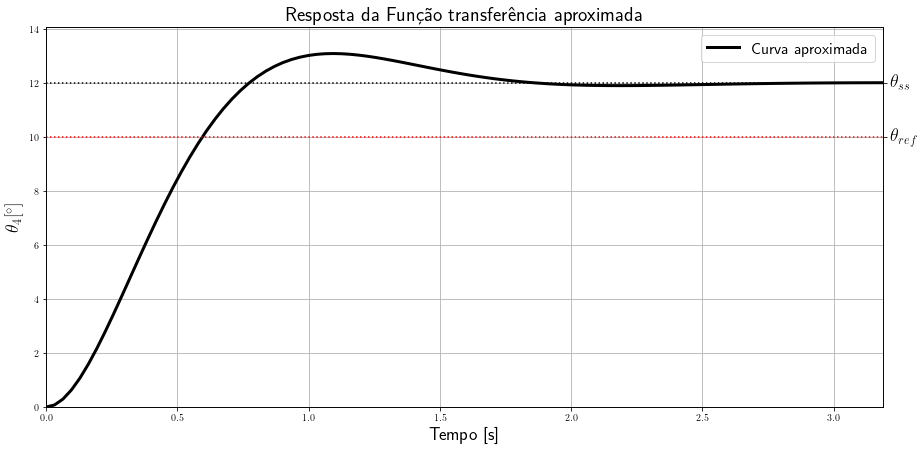

In [172]:
ref = 10.0    # change in u
sys1 = signal.TransferFunction(num,den)
t1,y1 = signal.step(sys1)

y=ref*y1
x=t1

fig, ax1 = plt.subplots(figsize=(15, 7),sharey=True,sharex=True)
plt.xlabel('Tempo [s]', fontsize=18)
plt.ylabel(r"$\theta_{4} [{}^{\circ}]$", fontsize=18)
ax1.plot(x,y,'k',linewidth=3,label='Curva aproximada')
ax1.set_ylim(min(y),max(y)+1)
ax1.grid(True)

y_ss = ref*(num/den[2])
ax2=ax1.twinx()
ax2.plot([0,max(x)],[y_ss,y_ss],'k:')
ax2.plot([0,max(x)],[ref,ref],'r:')
ax2.set_ylim(min(y),max(y)+1)
ax2.set_yticks([ref,y_ss])
ax2.set_yticklabels([r"$\theta_{ref}$",r"$\theta_{ss}$"], fontsize=18)

plt.xlim([0,max(x)])
ax1.legend(loc='best', fontsize=16)
plt.title("Resposta da Função transferência aproximada", fontsize=20,color='black')
plt.show()


<h2> Experimento B </h2>


\begin{equation}
\ddot{\theta}_2 = \frac{l_2 (F_1+F_2) - f_{s_2}\dot{\theta}_2}{den_3}
\label{eq:movimentotheta2}
\end{equation}

\begin{equation}
    G_2(s)=\frac{\Theta_2(s)}{F(s)} = \frac{2l_2}{s(den_3+f_{s_2})}
\end{equation}

In [73]:
Eq[1] = l2*(f1+f2)-fs2*diff(theta2,t)-diff(diff(theta2,t),t)*den3;
Eq[1]

-den3*theta2'' - fs_2*theta2' + l_2*(F_1 + F_2)

In [74]:
simpl={f1:f,f2:f}
Eq[1]=Eq[1].subs(simpl)
Eq[1]

-den3*theta2'' - fs_2*theta2' + 2*l_2*F

In [75]:
transformada=L(Eq[1])
Laplace={L(f):F,L((diff(diff(theta2,t),t))):(s*s*Theta2),L(diff(theta2,t)):(s*Theta2),L(theta2):Theta2}

In [76]:
transformada=transformada.subs(Laplace)
transformada

-den3*s**2*\Theta_2(s) - fs_2*s*\Theta_2(s) + 2*l_2*F(s)

In [77]:
G2=transformada.coeff(F)/(-1*transformada.coeff(Theta2))
G2

2*l_2/(den3*s**2 + fs_2*s)

\begin{equation}
    H_2(s)=\frac{\Theta_2(s)}{R(s)}=\frac{K_p G_2(s)}{1+K_p G_2(s)} =
    \frac{2K_pl_2}{s^2 den_3+s f_{s_2}+2 K_p l_2}
    \label{eq:h2s}
\end{equation}


\begin{equation}
\begin{cases}
    \omega^2_n=\frac{2K_p l_2}{{den}_3}\\
    2 \xi \omega_n=\frac{f_{s_2}}{{den}_3}\\
    K \omega^2_n=\frac{2K_p l_2}{{den}_3}
\end{cases}
\end{equation}

In [78]:
H2=(Kp*G2)/(1+Kp*G2)
H2=H2.simplify()
H2

2*K_p*l_2/(2*K_p*l_2 + den3*s**2 + fs_2*s)

In [81]:
H2teorico=H2.subs(valores_den).subs(valores_den).subs(valores_m).subs(valores_Ix).subs(valores_Iy).subs(valores_Iz).subs(valores_l).subs(valores_lg).subs(valor_g).subs(valor_b)
H2teorico

1.19*K_p/(1.19*K_p + fs_2*s + 0.68571497049*s**2)

<h2> Valores obtidos experimentalmente</h2>

Método analítico

\begin{align}
K&=1.1645
&\xi&=0.3557
&\omega_n&=3.6111
\end{align}

Método usando algoritmo genético

\begin{align}
K&=1.3041
&\xi&=0.1832
&\omega_n&=2.9256
\end{align}

In [165]:
#valores_exp={K:1.1645,xi:0.3557,wn:3.6111}
valores_exp={K:1.3041,xi:0.1832,wn:2.9256}
Hexp=H.subs(valores_exp)
Hexp

11.161968422976/(s**2 + 1.07193984*s + 8.55913536)

In [166]:
# Coletando os coeficientes
num, den = fraction(Hexp)
num=Poly(num,s)
den=Poly(den,s)

num=num.all_coeffs()
den=den.all_coeffs()

#list to array
num = np.asarray(num, dtype=np.float32)
den = np.asarray(den, dtype=np.float32)

#truncando valores até a quarta casa decimal
num=(num).round(decimals=4)
den=(den).round(decimals=4)

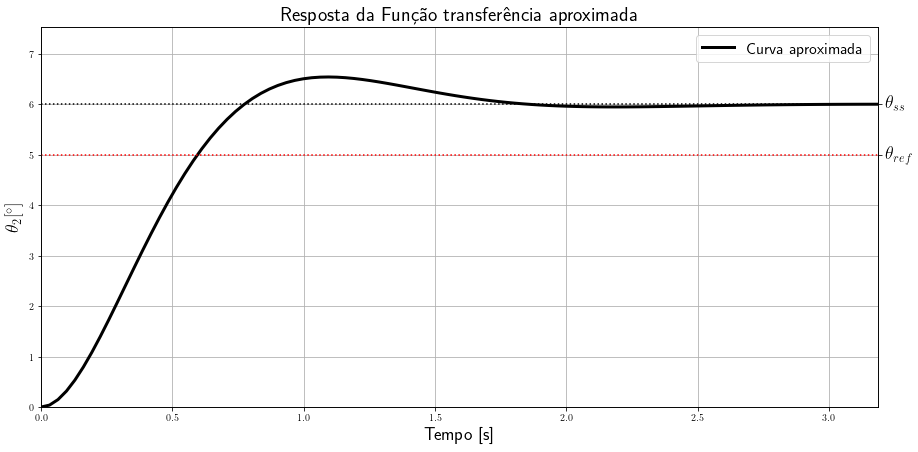

In [173]:
ref = 5.0    
sys2 = signal.TransferFunction(num,den)
t2,y2 = signal.step(sys2)

y=ref*y2
x=t2

fig, ax1 = plt.subplots(figsize=(15, 7),sharey=True,sharex=True)
plt.xlabel('Tempo [s]', fontsize=18)
plt.ylabel(r"$\theta_{2} [{}^{\circ}]$", fontsize=18)
ax1.plot(x,y,'k',linewidth=3,label='Curva aproximada')
ax1.set_ylim(min(y),max(y)+1)
ax1.grid(True)

y_ss = ref*(num/den[2])
ax2=ax1.twinx()
ax2.plot([0,max(x)],[y_ss,y_ss],'k:')
ax2.plot([0,max(x)],[ref,ref],'r:')
ax2.set_ylim(min(y),max(y)+1)
ax2.set_yticks([ref,y_ss])
ax2.set_yticklabels([r"$\theta_{ref}$",r"$\theta_{ss}$"], fontsize=18)

plt.xlim([0,max(x)])
ax1.legend(loc='best', fontsize=16)
plt.title("Resposta da Função transferência aproximada", fontsize=20,color='black')
plt.show()

In [98]:
# tau * dy2/dt2 + 2*zeta*tau*dy/dt + y = Kp*u
Kp = 2.0    # gain
tau = 1.0   # time constant
zeta = 0.25 # damping factor
theta = 0.0 # no time delay
du = 1.0    # change in u

# (1) Transfer Function
num = [Kp]
den = [tau**2,2*zeta*tau,1]
sys1 = signal.TransferFunction(num,den)
t1,y1 = signal.step(sys1)

# (2) State Space
A = [[0.0,1.0],[-1.0/tau**2,-2.0*zeta/tau]]
B = [[0.0],[Kp/tau**2]]
C = [1.0,0.0]
D = 0.0
sys2 = signal.StateSpace(A,B,C,D)
t2,y2 = signal.step(sys2)

# (3) ODE Integrator
def model3(x,t):
    y = x[0]
    dydt = x[1]
    dy2dt2 = (-2.0*zeta*tau*dydt - y + Kp*du)/tau**2
    return [dydt,dy2dt2]
t3 = np.linspace(0,25,100)
x3 = odeint(model3,[0,0],t3)
y3 = x3[:,0]

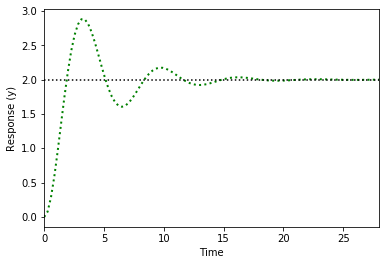

In [100]:
plt.figure(1)
#plt.plot(t1,y1*du,'k',linewidth=3)#label='Transfer Fcn')
#plt.plot(t2,y2*du,'g:',linewidth=2,label='State Space')
#plt.plot(t3,y3,'r-',linewidth=1,label='ODE Integrator')
y_ss = Kp * du
plt.plot([0,max(t1)],[y_ss,y_ss],'k:')
plt.xlim([0,max(t1)])
plt.xlabel('Time')
plt.ylabel('Response (y)')
#plt.legend(loc='best')
plt.savefig('2nd_order.png')
plt.show()

Kp: 2.0
taus: 0.5
zeta: 0.15
Summary of response
rise time: 0.8705314960358076
peak time: 1.58877169505245
overshoot: 0.6208712729227059
decay ratio: 0.3854811375406612
period: 3.1775433901049


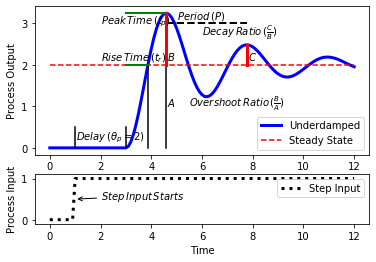

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
from scipy.integrate import odeint

# specify number of steps
ns = 120
# define time points
t = np.linspace(0,ns/10.0,ns+1)

class model(object):
    # default process model
    Kp = 2.0
    taus = 0.5
    thetap = 2.0
    zeta = 0.15

def process(x,t,u,Kp,taus,zeta):
    # Kp = process gain
    # taus = second order time constant
    # zeta = damping factor
    # ts^2 dy2/dt2 + 2 zeta taus dydt + y = Kp u(t-thetap)
    y = x[0]
    dydt = x[1]
    dy2dt2 = (-2.0*zeta*taus*dydt - y + Kp*u)/taus**2
    return [dydt,dy2dt2]

def calc_response(t,m):
    # t = time points
    # m = process model
    Kp = m.Kp
    taus = m.taus
    thetap = m.thetap
    zeta = m.zeta

    print('Kp: ' + str(Kp))
    print('taus: ' + str(taus))
    print('zeta: ' + str(zeta))

    # specify number of steps
    ns = len(t)-1
    delta_t = t[1]-t[0]

    # storage for recording values
    op = np.zeros(ns+1)  # controller output
    pv = np.zeros((ns+1,2))  # process variable

    # step input
    op[10:]=1.0

    # Simulate time delay
    ndelay = int(np.ceil(thetap / delta_t)) 

    # loop through time steps    
    for i in range(0,ns):
        # implement time delay
        iop = max(0,i-ndelay)
        inputs = (op[iop],Kp,taus,zeta)
        y = odeint(process,pv[i],[0,delta_t],args=inputs)
        pv[i+1] = y[-1]
    return (pv,op) 

# underdamped step response
(pv,op) = calc_response(t,model)

# rename parameters
tau = model.taus
zeta = model.zeta
du = 2.0
s = 3.0

# peak time
tp = np.pi * tau / np.sqrt(1.0-zeta**2)
# rise time
tr = tau / (np.sqrt(1.0-zeta**2)) * (np.pi-np.arccos(zeta))
# overshoot ratio
os = np.exp(-np.pi * zeta / (np.sqrt(1.0-zeta**2)))
# decay ratio
dr = os**2
# period
p = 2.0 * np.pi * tau / (np.sqrt(1.0-zeta**2))

print('Summary of response')
print('rise time: ' + str(tr))
print('peak time: ' + str(tp))
print('overshoot: ' + str(os))
print('decay ratio: ' + str(dr))
print('period: ' + str(p))

plt.figure(1)
g = gs.GridSpec(2, 1, height_ratios=[3, 1]) 
ap = {'arrowstyle': '->'}

plt.subplot(g[0])
plt.plot(t,pv[:,0],'b-',linewidth=3,label='Underdamped')
plt.plot([0,max(t)],[2.0,2.0],'r--',label='Steady State')
plt.plot([1,1],[0,0.5],'k-')
plt.plot([3,3],[0,0.5],'k-')
plt.plot([3+tr,3+tr],[0,2],'k-')
plt.plot([3+tp,3+tp],[0,2],'k-')
plt.plot([3,3+tr],[2,2],'g-',linewidth=2)
plt.plot([3,3+tp],[2*(1+os),2*(1+os)],'g-',linewidth=2)
plt.plot([3+tp,3+tp+p],[3,3],'k--',linewidth=2)
plt.plot([3+tp,3+tp],[2,2*(1.0+os)],'r-',linewidth=3)
plt.plot([3+tp+p,3+tp+p],[2,2*(1+os*dr)],'r-',linewidth=3)
plt.legend(loc=4)
plt.ylabel('Process Output')

tloc = (1.05,0.2)
txt = r'$Delay\,(\theta_p=2)$'
plt.annotate(s=txt,xy=tloc)

tloc = (2,2.1)
txt = r'$Rise\,Time\,(t_r)$'
plt.annotate(s=txt,xy=tloc)

tloc = (2,3)
txt = r'$Peak\,Time\,(t_p)$'
plt.annotate(s=txt,xy=tloc)

tloc = (5,3.1)
txt = r'$Period\,(P)$'
plt.annotate(s=txt,xy=tloc)

tloc = (3+tp+0.05,1.0)
txt = r'$A$'
plt.annotate(s=txt,xy=tloc)

tloc = (3+tp+0.05,2.1)
txt = r'$B$'
plt.annotate(s=txt,xy=tloc)

tloc = (3+tp+p+0.05,2.1)
txt = r'$C$'
plt.annotate(s=txt,xy=tloc)

tloc = (6,2.7)
txt = r'$Decay\,Ratio\,(\frac{C}{B})$'
plt.annotate(s=txt,xy=tloc)

tloc = (5.5,1.0)
txt = r'$Overshoot\,Ratio\,(\frac{B}{A})$'
plt.annotate(s=txt,xy=tloc)

plt.subplot(g[1])
plt.plot(t,op,'k:',linewidth=3,label='Step Input')
plt.ylim([-0.1,1.1])
plt.legend(loc='best')
plt.ylabel('Process Input')
plt.xlabel('Time')

pt = (1.0,0.5)
tloc = (2.0,0.5)
txt = r'$Step\,Input\,Starts$'
plt.annotate(s=txt,xy=pt,xytext=tloc,arrowprops=ap)

plt.savefig('output.png')
plt.show()